In [1]:
import accelerator_environments
from accelerator_environments.wrappers import NormalizeAction, NormalizeObservation, ScaleReward, ScaleActuators
from accelerator_environments.utils import unwrap
import gym
from gym.wrappers import TimeLimit, Monitor
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import TD3

In [2]:
model = TD3.load("model-stellar-oath-167")
model

In [3]:
env = gym.make("ARESEA-JOSS-v1",
               target_translation=True,
               random_actuators=True,
               random_incoming=True,
               simulate_screen=True,
               reward_method="regret")
env = TimeLimit(env, max_episode_steps=50)
env = NormalizeAction(env)
env = NormalizeObservation(env)
env = ScaleReward(env, unwrap(env).observation_space.high[0])
env = Monitor(env, f"recordings/test18", video_callable=lambda _: True)
env

initializing ocelot...


<Monitor<ScaleReward<NormalizeObservation<NormalizeAction<TimeLimit<ARESEAJOSS<ARESEA-JOSS-v1>>>>>>>

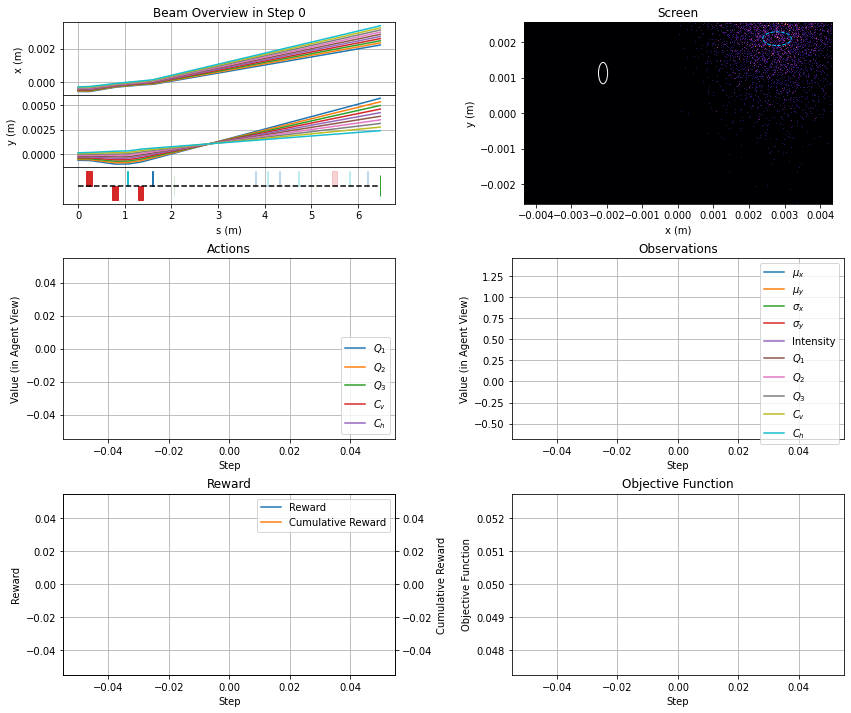

In [4]:
observation = env.reset()

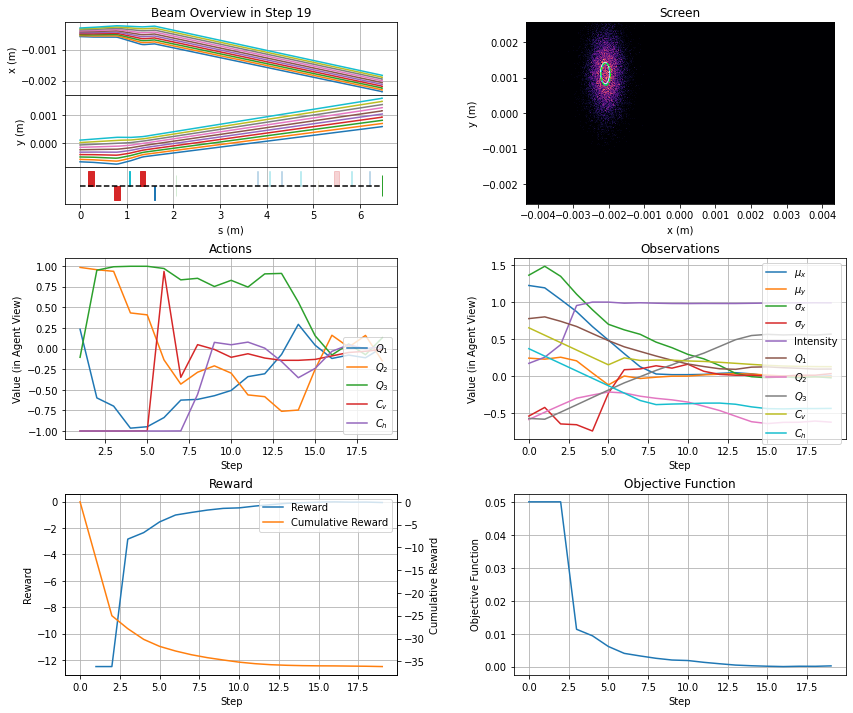

In [5]:
done = False
# observation = env.reset()
# observation, _, _, _ = env.step(np.array([0.0, 0.0, 0.0, 0.0, 0.0]))
while not done:
    action, _ = model.predict(observation)
    observation, reward, done, info = env.step(action)
env.close()

In [6]:
env.actuators

array([ 9.5282131e-01, -6.2242885e+00,  5.6709852e+00,  1.2714676e-04,
       -4.3641365e-04], dtype=float32)